# Regression Logistique 

In [1]:
# Import libraries and modules

# Import the necessary libraries
import sys
import os

# Add the project directory to the sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import everything from lib_import.py, data_exploring.py, data_preprocessing.py 
from lib.lib_import import *
from src.data_preprocessing import *

# Import the data
from data.data_extract import load_data

Everything imported successfully.


In [2]:
# Load the data

df_data = load_data()
df_data.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
# import functions from data_preprocessing.py
import sys
import os

# Ajouter le chemin du dossier parent pour que Python puisse trouver le module 'data'
module_path = os.path.abspath(os.path.join('..'))
#print(module_path)
if module_path not in sys.path:
    sys.path.append(module_path)
    

from src import data_preprocessing
#from data import extract_data
from src import evaluate


In [4]:
df = df_data.copy()


# Pretraitement

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:

df = data_preprocessing.preprocess(df)
df.head()


,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp,83311,13,Married,Exec-managerial,Married,White,Male,0,0,13,United-States,0
2,38,Private,215646,9,Now Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,7,Married,Handlers-cleaners,Married,Black,Male,0,0,40,United-States,0
4,28,Private,338409,13,Married,Prof-specialty,Married,Black,Female,0,0,40,Other,0


In [7]:
df.shape

(48592, 14)

In [8]:
## calcul de duplication
df.duplicated().sum()

48

In [9]:
df = df.drop_duplicates()

In [10]:
df.shape

(48544, 14)

In [12]:
df_train, df_test = data_preprocessing.seperate_train_test(df, random_state=42)

In [20]:
cat_features = data_preprocessing.get_cat_features(df)
cont_features = data_preprocessing.get_cont_features(df)
#supprimer la colonne '>50K' de la liste des variables continues


In [21]:
cont_features

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [22]:
cat_features

Index(['workclass', 'marital-status', 'occupation', 'relationship', 'race',
       'sex', 'native-country', 'education-num'],
      dtype='object')

In [23]:
df_train,df_test = data_preprocessing.impute_missing_cat_values(df_train, df_test,cat_features,strategy='most_frequent')


In [24]:
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
20628,25,Private,197303,13,Never-married,Prof-specialty,Own-child,White,Female,0,0,40,United-States,0
34928,32,Self-emp,158603,11,Never-married,Sales,Unmarried,White,Female,0,0,7,United-States,0
18703,73,Federal-gov,127858,10,Now Single,Tech-support,Not-in-family,White,Female,3273,0,40,United-States,0
26780,42,Self-emp,78765,10,Now Single,Exec-managerial,Unmarried,White,Male,0,0,90,United-States,1
38471,35,Self-emp,190759,10,Now Single,Craft-repair,Own-child,White,Male,0,0,40,United-States,0


In [25]:
df_train,df_test = data_preprocessing.standardize(df_train, df_test, cont_features)

In [26]:
df_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,>50K
20628,-0.993898,Private,0.070748,1.149415,Never-married,Prof-specialty,Own-child,White,Female,-0.231956,-0.218153,-0.031402,United-States,0
34928,-0.484253,Self-emp,-0.295999,0.367959,Never-married,Sales,Unmarried,White,Female,-0.231956,-0.218153,-2.692497,United-States,0
18703,2.500811,Federal-gov,-0.587359,-0.022769,Now Single,Tech-support,Not-in-family,White,Female,1.052857,-0.218153,-0.031402,United-States,0
26780,0.243811,Self-emp,-1.052597,-0.022769,Now Single,Exec-managerial,Unmarried,White,Male,-0.231956,-0.218153,4.000560,United-States,1
38471,-0.265834,Self-emp,0.008732,-0.022769,Now Single,Craft-repair,Own-child,White,Male,-0.231956,-0.218153,-0.031402,United-States,0


In [27]:
df_train_encoded,df_test_encoded = encode_cat_features_onehot(df_train, df_test, cat_features)

In [29]:
df_train_encoded.shape

(38835, 65)

In [30]:
df_train = df_train_encoded
df_test = df_test_encoded

In [31]:
df_test.shape

(9709, 65)

# Modélisation

In [32]:
df_train_select = df_train.drop('>50K', axis=1)
df_test_select = df_test.drop('>50K', axis=1)
target_train = df_train['>50K']
target_test = df_test['>50K']

In [33]:
X_train = df_train_select.values
X_test = df_test_select.values

y_train = df_train['>50K'].values
y_test = df_test['>50K'].values


## Model 1 : Regression Logistique

In [34]:
logreg = LogisticRegression(penalty=None, tol=10e-6, random_state=7) # tol (hyperparametre) est la tolérance pour l'arrêt de l'optimisation , valeur minimale de la fonction de coût
logregRidge = LogisticRegression(C=0.1, penalty='l2', tol=10e-6, random_state=7) # plus C est bas plus la regularisation est forte.. C est l'inverse de lambda (parametre de régularisation)
logregLasso = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', tol=10e-6, random_state=7)
logregElasticNet = LogisticRegression(C=0.1, penalty='elasticnet', solver='saga', l1_ratio=0.7, tol=10e-6, random_state=7) # l1_ratio est le ratio de la pénalité L1 dans la pénalité L1 + L2


In [ ]:
dict_models = {
    "Reression logistique": logreg,
              "Regression logistique + Ridge": logregRidge,
              "Regression logistique + Lasso": logregLasso,
              "Regression logistique + Elastic Net": logregElasticNet
                }

In [ ]:
X_train.shape

In [ ]:
X_test.shape

Regression logistique

Matrice de confusion:
[[6928  494]
 [ 987 1300]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7422
           1       0.72      0.57      0.64      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.746112 



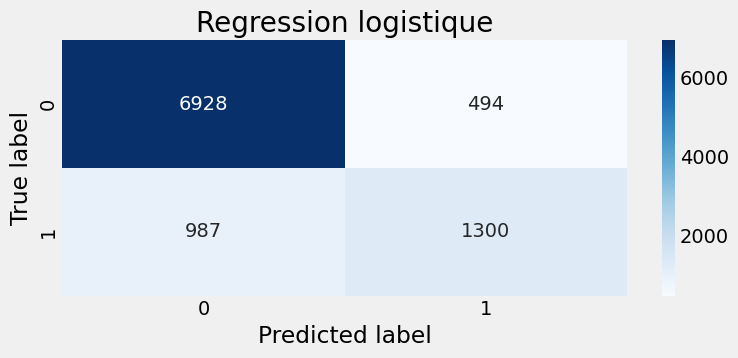

In [35]:
## Régression logistique
# logreg.fit(X_train_up, y_train_up)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "Regression logistique")

Lasso

Matrice de confusion:
[[6945  477]
 [1009 1278]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7422
           1       0.73      0.56      0.63      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.694613 



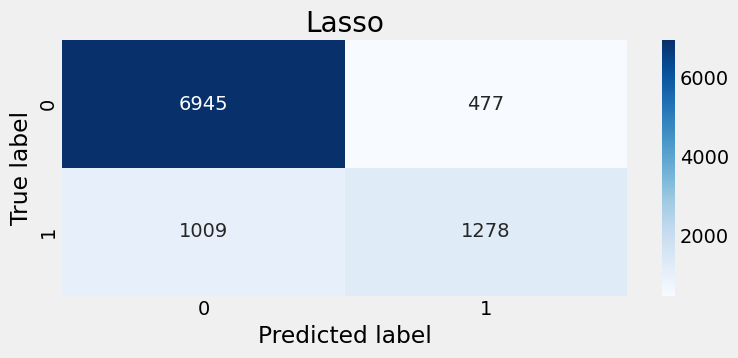

In [36]:
## régression logistique + Lasso
logregLasso.fit(X_train, y_train)
y_pred = logregLasso.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "Lasso")



elastic_net

Matrice de confusion:
[[6942  480]
 [1000 1287]] 

Rapport de classification:
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      7422
           1       0.73      0.56      0.63      2287

    accuracy                           0.85      9709
   macro avg       0.80      0.75      0.77      9709
weighted avg       0.84      0.85      0.84      9709
 

Exactitude: 84.756412 



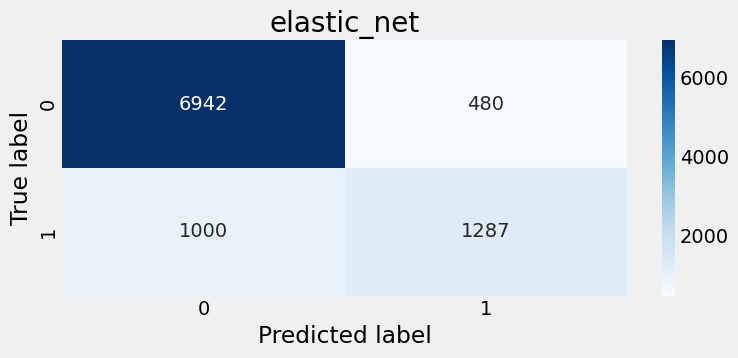

In [37]:
## régression logistique + elasticnet
logregElasticNet.fit(X_train, y_train)
y_pred = logregElasticNet.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "elastic_net")



# Modélisation prédictive avec  sur-échantillonnage de la classe minoritaire

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=7)

# Do the process
X_train_up, y_train_up = smt.fit_resample(X_train, y_train)

In [ ]:
## Régression logistique avec SMOTE
logreg.fit(X_train_up, y_train_up)
y_pred = logreg.predict(X_test)

# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, "Regression Logistique + SMOTE")

In [ ]:
##  ridge + SMOTE
logregRidge.fit(X_train_up, y_train_up)
y_pred = logregRidge.predict(X_test)
# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'Ridge + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

In [ ]:
##  lasso + SMOTE
logregLasso.fit(X_train_up, y_train_up)
y_pred = logregLasso.predict(X_test)
# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'Lasso + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

In [ ]:
##  ElasticNet + SMOTE
logregElasticNet.fit(X_train_up, y_train_up)
y_pred = logregElasticNet.predict(X_test)
# reload the module data_preprocessing
importlib.reload(evaluate)
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'ElasticNet + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

En sur-echantillant la classe minoritaire, le f1_score de la classe 1 augmente  legerement et celui du classe 0 diminue legerement

## Optimisation des hyper-parametres avec Grid Search

In [ ]:
logregLasso

In [ ]:
param_grid = {'C': [0.001, 0.01, 0.1, 1., 10.], 'max_iter': [100, 200, 300]}
grid = GridSearchCV(logregLasso, param_grid, verbose=False, n_jobs=1, return_train_score=True, scoring='f1')
grid.fit(X_train_up, y_train_up)

In [ ]:
grid.best_params_

In [ ]:
grid_logreg = grid.best_estimator_
grid_logreg

In [ ]:
predictions = grid_logreg.fit(X_train, y_train)

In [ ]:
grid_logreg.score(X_train, y_train)

In [ ]:
grid_logreg.score(X_test, y_test)

In [ ]:
# performance de régression logistique avec GridSearchCV
y_pred = grid_logreg.predict(X_test)

evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'ElasticNet + SMOTE') # Afficher la matrice de confusion et enrigistrer l'image dans le dossier 'images'

## Courbe de validation

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.06, 30)

train_score, val_score = validation_curve(logregRidge,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Ridge")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

Pour la plupart des valeurs de lambda, le modèle est en sur-apprentissage

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.09, 30)

train_score, val_score = validation_curve(logregLasso,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique Lasso")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

Modèle Lasso est ajusté

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.validation_curve.html#sklearn.model_selection.validation_curve
list_hyperparams = np.linspace(0.0001, 0.06, 30)

train_score, val_score = validation_curve(logregElasticNet,
                                          X_train_up,
                                          y_train_up,
                                          param_name='C', 
                                          param_range=list_hyperparams, 
                                          cv=5,
                                         scoring="f1",)

plt.figure(figsize=(12, 4))
plt.plot(list_hyperparams, train_score.mean(axis = 1), label = 'train')
plt.plot(list_hyperparams, val_score.mean(axis = 1), label = 'validation')
plt.legend()
plt.title("Courbe de validation pour la régression logistique ElasticNet ")
plt.ylabel('score')
plt.xlabel('Paramètre de régularisation: ' r'$\lambda = \frac{1}{C}$')
plt.show()

A partir de lambda = 0.02, le modèle conserve son performance

## Courbe d'apprentissage

In [ ]:
N, train_score, val_score = learning_curve(logregLasso, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.legend()
plt.title("Courbe d'apprentissage pour la régression logistique Lasso")

Modele en sous apprentissage pour Lasso

In [ ]:
N, train_score, val_score = learning_curve(logregRidge, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10))

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title("Courbe d'apprentissage pour la régression logistique Ridge")

In [ ]:
N, train_score, val_score = learning_curve(logregElasticNet, X_train_up, y_train_up, 
                                           cv=5, scoring='f1',
                                           train_sizes=np.linspace(0.1, 1, 10)) # regarde les parametre de la fonction learning_curve 

plt.figure(figsize=(12,8))
plt.plot(N, train_score.mean(axis=1), label='train score')
plt.plot(N, val_score.mean(axis=1), label='validation score')
plt.title("Courbe d'apprentissage pour la régression logistique Elastic Net 1")

# Pipeline

In [ ]:
cat_features = data_preprocessing.get_cat_features(df)
cont_features = data_preprocessing.get_cont_features(df)

In [ ]:
# Imputation et Normalisation
catgoricalPipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OneHotEncoder(handle_unknown='ignore')
    )

continuousPipeline = make_pipeline(
    #SimpleImputer(strategy="median"),
    # KNNImputer(n_neighbors=3),
    StandardScaler(),
    # MinMaxScaler(),
    # SimpleImputer(strategy="constant"), # constante 0
    
)

preprocessor = make_column_transformer(
    (catgoricalPipeline, cat_features),
    (continuousPipeline, cont_features),
)
preprocessor

In [ ]:
# Modélisation
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

logregLasso = LogisticRegression(
    C=50, 
    penalty='l1', 
    solver='saga', 
    tol=10e-6, 
    random_state=7)


# Créer le pipeline avec SMOTE et le préprocesseur
pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor),
    #('selectkbest', SelectKBest(score_func=chi2, k=10)),
    ('smote', SMOTE(random_state=7)),
    ('classifier', logregLasso)
])

pipeline

In [ ]:
df.head()

In [ ]:
## Recherche des meilleurs hyperparamètres

# Séparation des données en variables explicatives X et target y
X = df.drop(columns=['>50K','fnlwgt'])  # Assurez-vous que '>50K' est le nom correct
y = df['>50K']

# Séparation des données en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir la grille de paramètres pour GridSearchCV
param_grid = {'classifier__C': [0.001, 0.01, 0.1, 1., 10.], 'classifier__max_iter': [100, 200, 300, 400]}
grid_search = GridSearchCV(pipeline, param_grid,  cv=5,verbose=False, n_jobs=1, return_train_score=True, scoring='f1')

# Ajuster GridSearchCV sur les données d'entraînement
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best F1 score: {grid_search.best_score_}")

# Utiliser le meilleur modèle pour prédire sur les données de test
y_pred = grid_search.predict(X_test)

# Afficher le rapport de classification
classification_report(y_test, y_pred)

In [ ]:
evaluate.plot_confusion_matrix_sns(y_test, y_pred, 'Lasso (pipeline 1)')